In [1]:
%load_ext nb_black
# !pip install nb_black
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import ColumnSelector
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from thundersvm import SVC as svmgpu
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, SMOTENC  # doctest: +NORMALIZE_WHITESPACE

# from multiscorer import MultiScorer
from sklearn.model_selection import cross_val_score
from numpy import average
import xgboost as xgb
from sklearn import metrics as m
import itertools

<IPython.core.display.Javascript object>

In [3]:
randomseed = 7
np.random.seed(randomseed)

<IPython.core.display.Javascript object>

In [4]:
# read the data set
x_original = pd.read_csv("../../../../dataset/XLable_onlyDiabeticRemoved.txt")

conditions = [
    (x_original.L100800 < 100),
    (x_original.L100800 >= 100) & (x_original.L100800 < 126),
    (x_original.L100800 >= 126),
]
choices = [0, 1, 2]
x_original["CLASS"] = np.select(conditions, choices, default=0)
x_original = x_original[
    [
        "Unnamed: 0",
        "L100800",
        "L104600",
        "L103000",
        "S000300",
        "L101700",
        "L100700",
        "FIELD_33",
        "FIELD_38",
        "FIELD_40",
        "FIELD_31",
        "SEX",
        "AGE",  #'CLASS',
        "FIELD_16",
        "FIELD_23",
        "FIELD_15",
        "FIELD_22",
        "FIELD_17",
        "FIELD_24",
    ]
]

print(x_original.shape)

y_original = pd.read_csv("../../../../dataset/TargetLable_onlyDiabeticRemoved.txt")

conditions = [
    (y_original.L100800 < 100),
    (y_original.L100800 >= 100) & (y_original.L100800 < 126),
    (y_original.L100800 >= 126),
]

choices = [0, 1, 2]
y_original["CLASS"] = np.select(conditions, choices, default=0)

y_original = y_original[["Unnamed: 0", "CLASS"]]

print(y_original.shape)

data = pd.merge(
    x_original, y_original, how="inner", left_on="Unnamed: 0", right_on="Unnamed: 0"
)

# filter the data set
data = data[data.FIELD_16 != 1]  # exclude people who are diagnosed for (diabetes)
data = data[data.FIELD_23 != 1]  # exclude people who are on medication for diabetes

data = data[
    data.FIELD_15 != 1
]  # exclude people who are diagnosed for (high blood pressure)
data = data[
    data.FIELD_22 != 1
]  # exclude people who are on medication for high blood pressure

data = data[data.FIELD_17 != 1]  # exclude people who are diagnosed for hyperlipidemia
data = data[
    data.FIELD_24 != 1
]  # exclude people who are on medication for hyperlipidemia

print(data.shape)

data = data[
    [
        "L100800",
        "L104600",
        "L103000",
        "S000300",
        "L101700",
        "L100700",
        "FIELD_33",
        "FIELD_38",
        "FIELD_40",
        "FIELD_31",
        "SEX",
        "AGE",
        "CLASS",
    ]
]
data = data.dropna()
print(data.shape)
data.head()

diabetic = data[data.CLASS == 2]
prediabetic = data[data.CLASS == 1]
normal = data[data.CLASS == 0]

print(diabetic.shape[0], prediabetic.shape[0], normal.shape[0])

diabetic_test = diabetic.sample(200, random_state=randomseed)
prediabetic_test = prediabetic.sample(200, random_state=randomseed)
normal_test = normal.sample(200, random_state=randomseed)
test = pd.concat([diabetic_test, prediabetic_test, normal_test])

diabetic_train = diabetic.drop(diabetic_test.index)
prediabetic_train = prediabetic.drop(prediabetic_test.index)
# .sample(
#     10 * diabetic_train.shape[0], random_state=randomseed
# )
normal_train = normal.drop(normal_test.index).sample(
    prediabetic_train.shape[0],
    random_state=randomseed
    #     10 * diabetic_train.shape[0], random_state=randomseed
)
train = pd.concat([diabetic_train, diabetic_train, prediabetic_train, normal_train])


xtrain = train.iloc[:, :-1]
xtest = test.iloc[:, :-1]

ytest = test.iloc[:, -1]
ytrain = train.iloc[:, -1]


scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
randomseed = 42

sm = SMOTE(random_state=randomseed, sampling_strategy="minority")

X_res, y_res = sm.fit_resample(xtrain, ytrain)
xtrain = X_res
ytrain = y_res

(185843, 19)
(185843, 2)
(169024, 20)
(56542, 13)
1045 17331 38166


<IPython.core.display.Javascript object>

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler



<IPython.core.display.Javascript object>

In [6]:
xtrain.shape

(51393, 12)

<IPython.core.display.Javascript object>

In [7]:
# Using Relu activation, and Adam optimizer, 50 epochs
model = Sequential()
model.add(Dense(16, input_dim=12, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))


model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(2, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(2, activation="relu"))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(1, activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train model
history = model.fit(xtrain, ytrain, epochs=150, batch_size=20, verbose=1)
# Print Accuracy
scores = model.evaluate(xtest, ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

Epoch 1/150
2570/2570 [==============================] - 3s 1ms/step - loss: 8.8565 - accuracy: 0.3369
Epoch 2/150
2570/2570 [==============================] - 3s 1ms/step - loss: 2.3893 - accuracy: 0.3349
Epoch 3/150
2570/2570 [==============================] - 4s 1ms/step - loss: 0.3083 - accuracy: 0.3349
Epoch 4/150
2570/2570 [==============================] - 4s 1ms/step - loss: 0.0609 - accuracy: 0.3333
Epoch 5/150
2570/2570 [==============================] - 4s 1ms/step - loss: 0.0279 - accuracy: 0.3333
Epoch 6/150
2570/2570 [==============================] - 4s 1ms/step - loss: 0.0635 - accuracy: 0.3333
Epoch 7/150
2570/2570 [==============================] - 4s 2ms/step - loss: 0.0061 - accuracy: 0.3333
Epoch 8/150
2570/2570 [==============================] - 4s 1ms/step - loss: 0.0011 - accuracy: 0.3333
Epoch 9/150
2570/2570 [==============================] - 3s 1ms/step - loss: -1.2518e-04 - accuracy: 0.3333
Epoch 10/150
2570/2570 [==============================] - 3s 1ms/ste

Epoch 77/150
2570/2570 [==============================] - 3s 1ms/step - loss: 3.4441e-08 - accuracy: 0.3333
Epoch 78/150
2570/2570 [==============================] - 3s 1ms/step - loss: 1.3268e-08 - accuracy: 0.3333
Epoch 79/150
2570/2570 [==============================] - 3s 1ms/step - loss: -1.3620e-08 - accuracy: 0.3333
Epoch 80/150
2570/2570 [==============================] - 3s 1ms/step - loss: 2.2305e-08 - accuracy: 0.3333
Epoch 81/150
2570/2570 [==============================] - 3s 1ms/step - loss: 1.5291e-08 - accuracy: 0.3333
Epoch 82/150
2570/2570 [==============================] - 4s 1ms/step - loss: -1.9874e-08 - accuracy: 0.3333
Epoch 83/150
2570/2570 [==============================] - 4s 1ms/step - loss: 2.5422e-09 - accuracy: 0.3333
Epoch 84/150
2570/2570 [==============================] - 4s 1ms/step - loss: -1.3268e-08 - accuracy: 0.3333
Epoch 85/150
2570/2570 [==============================] - 3s 1ms/step - loss: -2.8651e-08 - accuracy: 0.3333
Epoch 86/150
2570/2570 [

<IPython.core.display.Javascript object>

In [8]:
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [9]:
from sklearn.base import clone


def drop_col_feat_imp(model, X_train, y_train, random_state=42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis=1), y_train)
        importances.append(benchmark_score - drop_col_score)

    importances_df = imp_df(X_train.columns, importances)
    return importances_df

<IPython.core.display.Javascript object>

In [10]:
rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features="auto",
)

<IPython.core.display.Javascript object>

In [11]:
from sklearn.base import clone


def imp_df(column_names, importances):
    df = (
        pd.DataFrame({"feature": column_names, "feature_importance": importances})
        #         .sort_values("feature_importance", ascending=False)
        #         .reset_index(drop=True)
    )
    return df


def drop_col_feat_imp(model, X_train, y_train, xtest, ytest, random_state=42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(xtest, ytest)
    benchmark_featureimportance = model_clone.feature_importances_

    print(benchmark_score)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        print(col)
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(xtest.drop(col, axis=1), ytest)
        importances.append(benchmark_score - drop_col_score)
        print(benchmark_score - drop_col_score, drop_col_score)

    importances_df = imp_df(X_train.columns, importances)
    return importances_df, benchmark_score, benchmark_featureimportance

<IPython.core.display.Javascript object>

In [12]:
importances_df, benchmark_score, benchmark_featureimportance = drop_col_feat_imp(
    rf,
    pd.DataFrame(xtrain, columns=data.columns[:-1]),
    ytrain,
    pd.DataFrame(xtest, columns=data.columns[:-1]),
    ytest,
    randomseed,
)

0.7333333333333333
L100800
0.046666666666666634 0.6866666666666666
L104600
0.011666666666666603 0.7216666666666667
L103000
0.0 0.7333333333333333
S000300
0.0016666666666665941 0.7316666666666667
L101700
0.0 0.7333333333333333
L100700
-0.0050000000000000044 0.7383333333333333
FIELD_33
0.0 0.7333333333333333
FIELD_38
-0.0033333333333334103 0.7366666666666667
FIELD_40
0.004999999999999893 0.7283333333333334
FIELD_31
0.004999999999999893 0.7283333333333334
SEX
0.009999999999999898 0.7233333333333334
AGE
0.009999999999999898 0.7233333333333334


<IPython.core.display.Javascript object>

In [13]:
Finalvalue = pd.DataFrame()
Finalvalue["features"] = data.columns[:-1]
Finalvalue["benchmark_featureimportance"] = benchmark_featureimportance
Finalvalue["importances_df"] = -importances_df.feature_importance
Finalvalue["newScore"] = benchmark_score - importances_df.feature_importance
Finalvalue = Finalvalue.sort_values(
    by="benchmark_featureimportance", ascending=False
).reset_index(drop=True)

<IPython.core.display.Javascript object>

<BarContainer object of 12 artists>

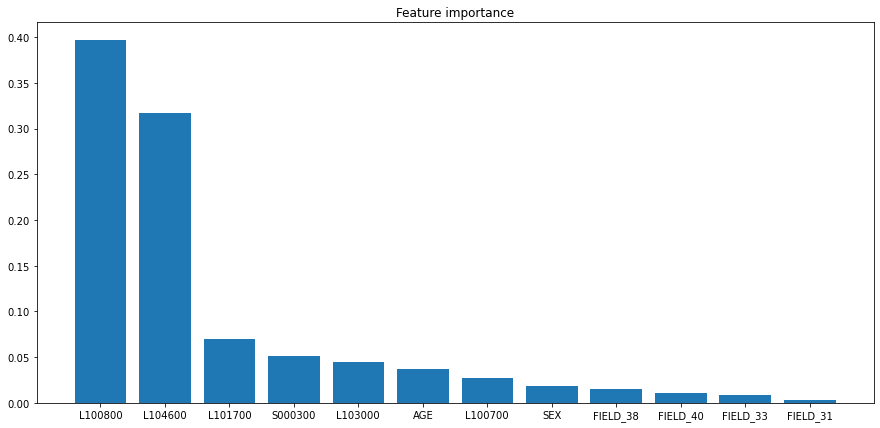

<IPython.core.display.Javascript object>

In [14]:
plt.rcParams["figure.figsize"] = (15, 7)
plt.title("Feature importance")
plt.bar(Finalvalue.features, Finalvalue.benchmark_featureimportance)

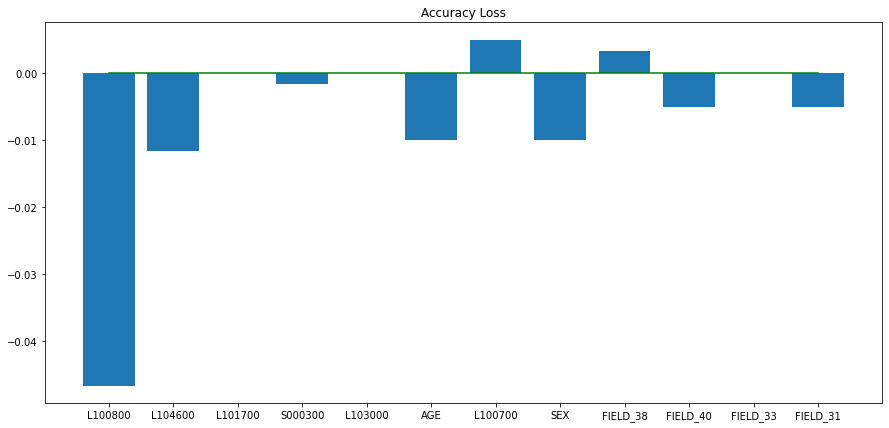

<IPython.core.display.Javascript object>

In [16]:
plt.bar(Finalvalue.features, Finalvalue.importances_df)
plt.title("Accuracy Loss")
plt.plot(Finalvalue.features, np.full((12, 1), 0.0), color="green")

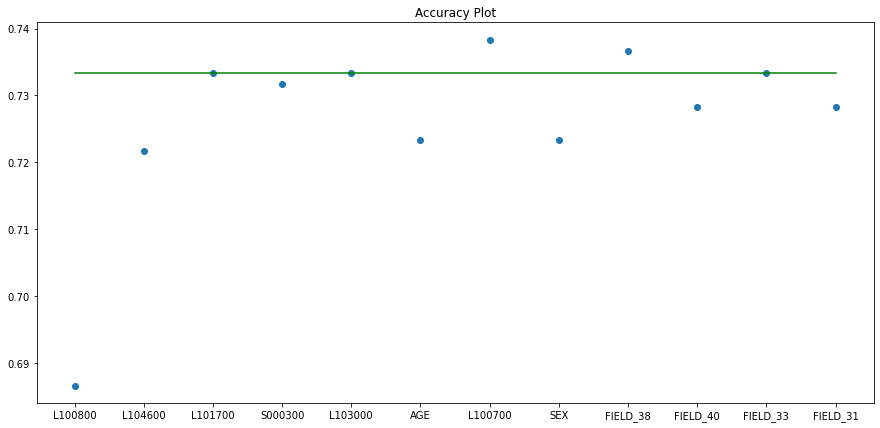

<IPython.core.display.Javascript object>

In [17]:
plt.scatter(Finalvalue.features, Finalvalue.newScore)
plt.title("Accuracy Plot")
plt.plot(Finalvalue.features, np.full((12, 1), 0.7333), color="green")

In [18]:
Finalvalue

,features,benchmark_featureimportance,importances_df,newScore
0,L100800,0.396264,-0.046667,0.686667
1,L104600,0.317464,-0.011667,0.721667
2,L101700,0.069805,-0.000000,0.733333
3,S000300,0.051339,-0.001667,0.731667
4,L103000,0.044488,-0.000000,0.733333
5,AGE,0.037111,-0.010000,0.723333
6,L100700,0.027338,0.005000,0.738333
7,SEX,0.018519,-0.010000,0.723333
8,FIELD_38,0.015621,0.003333,0.736667
9,FIELD_40,0.010854,-0.005000,0.728333


<IPython.core.display.Javascript object>